###  **Random Forest**: Kaggle Competition for House Prices

In [1]:
# Importing Packages
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Load the data

Data [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.shape, test.shape

((1460, 81), (1459, 80))

In [36]:
#Corelation between SalePrice and other Features
corr_matrix = train.corr()


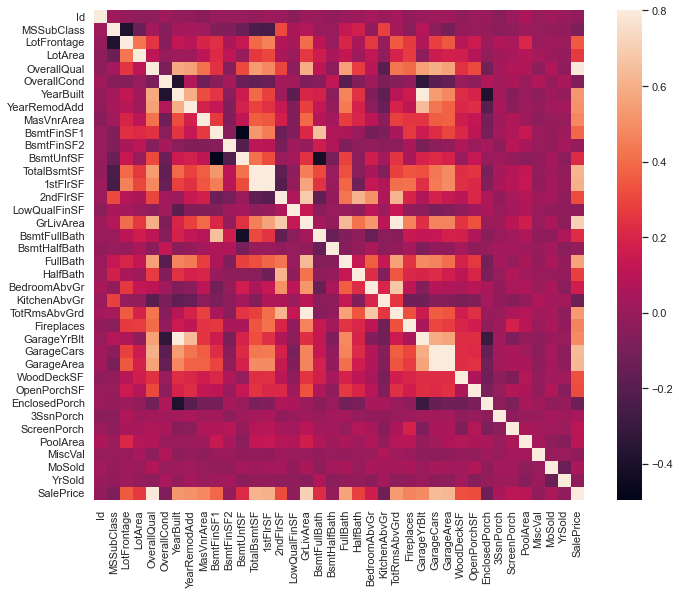

In [35]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True);

In [37]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageCars', 

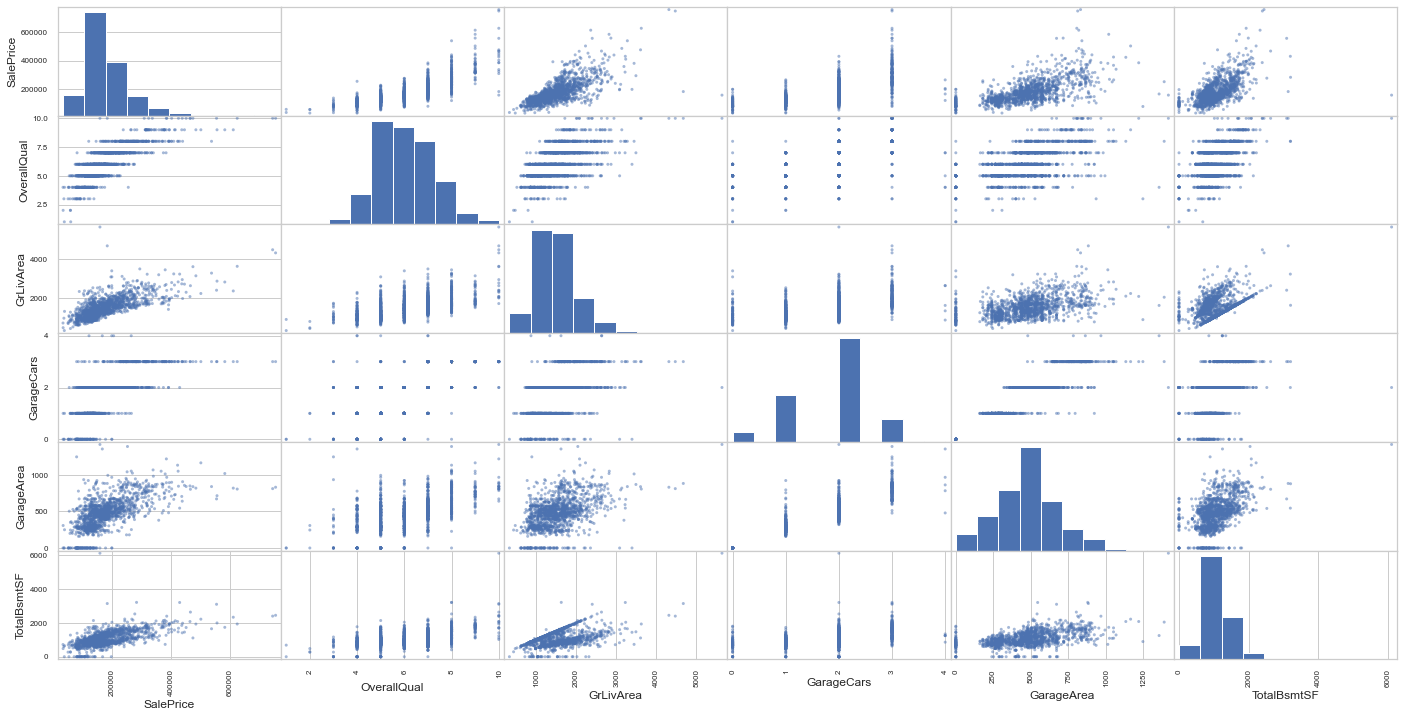

In [4]:
from pandas.plotting import scatter_matrix

features_matrix = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']

scatter_matrix(train[features_matrix],figsize=(24,12))

### Data Cleaning

In [5]:
train_features = train.drop('SalePrice',axis=1)
train_labels = train['SalePrice']

##### Looking into Null Values(in both Numericals and Categotical)

In [6]:
numeric = train_features._get_numeric_data().columns
categoric = [i for i in train_features.columns if i not in numeric]

In [7]:
train_features.isnull().sum().index
null_columns=[]
for i in range(len(train_features.isnull().sum().index)):
    if train_features.isnull().sum()[i] !=0:
        print(train_features.isnull().sum().index[i],'-',train_features.isnull().sum()[i])
        null_columns.append(train_features.isnull().sum().index[i])
    

LotFrontage - 259
Alley - 1369
MasVnrType - 8
MasVnrArea - 8
BsmtQual - 37
BsmtCond - 37
BsmtExposure - 38
BsmtFinType1 - 37
BsmtFinType2 - 38
Electrical - 1
FireplaceQu - 690
GarageType - 81
GarageYrBlt - 81
GarageFinish - 81
GarageQual - 81
GarageCond - 81
PoolQC - 1453
Fence - 1179
MiscFeature - 1406


In [8]:
null_num_columns = [i for i in null_columns if i in numeric]
null_cat_columns = [i for i in null_columns if i not in numeric]

In [33]:
train_num = train_features[numeric]
train_cat = train_features[categoric]


Now, we have our training dataset (num and cat). Our next step is to create a machine learning pipeline.

For filling null values, we are going to use SimpleImputer(with median values),for categorical columns we are using OneHotEncoder and then we are feature scaling for our train data using Machine Learning Pipelines

### Creating a Pipeline for Numeric and Categotical Values

In [10]:
# Numerical Imputing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scalar',StandardScaler())
])

In [11]:
# Categorical Imputing

from sklearn.compose import ColumnTransformer

final_pipeline = ColumnTransformer([
    ('num',num_pipeline,list(train_num.columns)),
    ('cat',OneHotEncoder(handle_unknown='ignore'),list(train_cat.columns))
])

train_final = final_pipeline.fit_transform(train_features)

### Train Model

## **Random Forest**

In [22]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_model = RandomForestRegressor()
RandomForest_model.fit(train_final, train_labels)

RandomForestRegressor()

In [23]:
def pred_rand(model):
    t_data = train_features.loc[:5]
    t_labels = train_labels.loc[:5]

    t_data_tr = final_pipeline.transform(t_data)
    pred = model.predict(t_data_tr)
    pred = [int(i) for i in pred]
    print('Predicted: ',pred)
    print('Real Labels: ',list(t_labels))
    
pred_rand(RandomForest_model)

Predicted:  [209955, 175820, 223644, 158882, 263826, 145023]
Real Labels:  [208500, 181500, 223500, 140000, 250000, 143000]


In [24]:

from sklearn.metrics import mean_squared_error
train_predictions =RandomForest_model.predict(train_final)
rf_mse = mean_squared_error(train_labels, train_predictions)
rf_rmse = np.sqrt(rf_mse)
print(rf_rmse)

10829.656600051974


##### RandomForest is performing better than other two algorithms for Train Data 

### Model 

In [26]:
rf_model_final = RandomForestRegressor(max_features=50,n_estimators= 200)
rf_model_final.fit(train_final, train_labels)

RandomForestRegressor(max_features=50, n_estimators=200)

In [28]:
train_predictions =rf_model_final.predict(train_final)
rf_mse = mean_squared_error(train_labels, train_predictions)
rf_rmse = np.sqrt(rf_mse)
print(rf_rmse)


10871.204561704488


**Here, we got less rmse. If we play with the fine tuning, we would get the better results.**

### Submission

In [29]:
test_final = final_pipeline.transform(test)

In [30]:
pred_prices = rf_model_final.predict(test_final)

In [31]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': pred_prices})
my_submission.to_csv('Random_Forest_submission.csv', index=False)